# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/JOINT.csv')

print(df.shape)
df.head(1)

(31023, 17)


,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2ROJOb98GorxStuOuZWcGd,Have You Ever Loved A Woman?,Derek & The Dominos,61,1970-11-01,0.303,0.648,0,-6.795,1,0.642,0.053,0.407,0.644,170.379,412960,3


In [3]:
df.drop(columns = ['time_signature'], inplace = True)

In [4]:
# Drop rows containing null values as they aren't a significant number
df.dropna(inplace = True)
df.shape

(31020, 16)

In [5]:
df.drop_duplicates(['id'], inplace = True)
df.shape

(27859, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27859 entries, 0 to 31022
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                27859 non-null  object 
 1   title             27859 non-null  object 
 2   all_artists       27859 non-null  object 
 3   popularity        27859 non-null  int64  
 4   release_date      27859 non-null  object 
 5   danceability      27859 non-null  float64
 6   energy            27859 non-null  float64
 7   key               27859 non-null  int64  
 8   loudness          27859 non-null  float64
 9   mode              27859 non-null  int64  
 10  acousticness      27859 non-null  float64
 11  instrumentalness  27859 non-null  float64
 12  liveness          27859 non-null  float64
 13  valence           27859 non-null  float64
 14  tempo             27859 non-null  float64
 15  duration_ms       27859 non-null  int64  
dtypes: float64(8), int64(4), object(4)
memor

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,27859.0,39.724577,25.118889,0.00000,21.0000,44.000000,59.0000,100.000
danceability,27859.0,0.591953,0.165591,0.00000,0.4880,0.605000,0.7120,0.988
energy,27859.0,0.664853,0.234083,0.00002,0.5320,0.715000,0.8500,0.999
key,27859.0,5.328942,3.569749,0.00000,2.0000,5.000000,9.0000,11.000
loudness,27859.0,-8.004376,4.953295,-47.07000,-9.5075,-6.651000,-4.8970,4.140
mode,27859.0,0.643921,0.478847,0.00000,0.0000,1.000000,1.0000,1.000
acousticness,27859.0,0.241546,0.301649,0.00000,0.0123,0.092300,0.3860,0.996
instrumentalness,27859.0,0.117908,0.269736,0.00000,0.0000,0.000064,0.0159,0.997
liveness,27859.0,0.186919,0.150959,0.01200,0.0928,0.126000,0.2420,0.987
valence,27859.0,0.537440,0.250574,0.00000,0.3440,0.546000,0.7410,0.993


---
**Feature engineering:**
- change 'release_date' to datetime and create new column with only the year and OHE this column
- change 'duration_ms' to 'duration' (miliseconds to seconds)\
(- Normalizing float variables)
- Bucketing 'popularity' by first converting it into: yes, medium, not and One-hot-encoding it after
- Bucketing 'duratinon' into: long, avg, short and One-hot-encoding it after
- Join 'title' and 'all_artist' column into one single one

- Multiplicar features que esten mas correlated y probar a ver como salen los clusters

In [8]:
#change release_date to datetime
df['release_year'] = df['release_date'].apply(lambda x: x.split('-')[0])
df.drop(columns = ['release_date'], inplace = True)

In [9]:
#Change duration in ms to seconds and drop duration_ms column
df['duration'] = df['duration_ms'].apply(lambda x: round(x/1000))
df.drop(columns = ['duration_ms'], inplace = True)

In [10]:
df.head()

,id,title,all_artists,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,release_year,duration
0,2ROJOb98GorxStuOuZWcGd,Have You Ever Loved A Woman?,Derek & The Dominos,61,0.303,0.648,0,-6.795,1,0.6420,0.053000,0.4070,0.644,170.379,1970,413
1,2Qj1FilGsXITZbFVmVeoLy,I'm Tore Down,Freddie King,57,0.640,0.496,2,-11.124,1,0.6160,0.000046,0.1830,0.954,116.632,1971,253
2,2FtX5tOFUVOyjcGQiuGR8f,"Damn Right, I've Got the Blues",Buddy Guy,57,0.353,0.921,2,-5.640,1,0.0488,0.065000,0.3140,0.526,145.589,1991,272
3,6f3OYG5R630tjwFIHIE7j2,Scratch My Back,The Fabulous Thunderbirds,56,0.775,0.499,4,-7.181,1,0.4960,0.021900,0.1140,0.862,121.056,1979,233
4,4VCl2a5JvdrEx6PL2P29ty,The Thrill Is Gone,B.B. King,0,0.554,0.516,9,-6.819,0,0.2240,0.286000,0.0548,0.562,90.309,2014,324


In [11]:
# Joining 'title' and 'all_artist' columns
df['song_artist'] = df['title'] + '-' + df['all_artists']
df.drop(columns = ['title', 'all_artists'], inplace = True)

---
https://towardsdatascience.com/machine-learning-and-recommender-systems-using-your-own-spotify-data-4918d80632e3
FEATURE engineering:
- Buketing: Popularity classificarle entre rangos en (popular, Medio popular, No popular) 
(https://www.youtube.com/watch?v=5bx3ccjSxro   min 11)(#https://www.youtube.com/watch?v=XDbj6PxaSf0 min 7)
- What age are you feeling like: old school vibes, New gen
- Hacer lo de weighting con el release date pero dandonle muy poca importancia!
- min 5: #https://www.youtube.com/watch?v=XDbj6PxaSf0

Para buscar o replace con porcentaje: min 16: https://www.youtube.com/watch?v=aHdgGnlIewk&list=TLPQMTgwMTIwMjLOQNHMg9wb3w&index=10

#Buscar caracteristicas de cada mood y hacer feature engineering

CREAR UNA PLAYLIST SEGUN EL PLAN QUE QUIERAS: PREGAME, ROADTRIP, DESCANSAR, CHILL, WORKOUT, STUDY. (maybe dar mas general tipo chill, motivation, party, rest.

FEED in 3 canciones que sean del plan que te cunde y luego elige dos o tres opciones que te damos.

EVALUATION METRIC: https://www.youtube.com/watch?v=v_mONWiFv0k&list=TLPQMjAwMTIwMjJJUuP7ZXiQDQ&index=7 min12 + 19

----
# Modeling

- Kmeans
- DBScans

### 1. Kmeans 
(clase 8.01)

From the above, note that $k$-Means clustering:
- is really fast!
- can only create convex clusters. This implies that its clusters can always be linearly separated.
- may have to be run multiple times to get the best clusters.

Because we know more or less how many genres there are we can pick a fair k for our clustering --> 15

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib

matplotlib.style.use('ggplot')

In [13]:
df.columns

Index(['id', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'release_year', 'duration', 'song_artist'],
      dtype='object')

In [14]:
# another way to OHE: https://www.youtube.com/watch?v=CIfZi0niNE0

In [15]:
df['release_year'] = df['release_year'].astype('int')

In [16]:
# Let's prepare our X matrix
X = df[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'release_year', 'duration']].copy()


In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [18]:
#k = 15 #Because more or less 15 genres
#km = KMeans(n_clusters=k, random_state=42)
#km.fit(X_sc)

#y_km = km.predict(X_sc)
#centers = km.cluster_centers_

#### Visually verifying cluster labels

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster.

Generally, Euclidean Distance is used as the distance metric between two points.



In [19]:
from sklearn.metrics import silhouette_score
for i in range(2, 15):
    km = KMeans(n_clusters = i, random_state = 42).fit(X_sc)
    print(i, silhouette_score(X_sc, km.labels_, metric = 'euclidean'))

2 0.27855656164726755
3 0.11892858915307065
4 0.11792981523123279
5 0.10423688733182944
6 0.10554433923268781
7 0.11128333573555634
8 0.11550823281384687
9 0.10948166649668897
10 0.11354945344958661
11 0.10124324008611185
12 0.10386380445472702
13 0.10526757062567314
14 0.1006804778002577


In [20]:
y_km = km.predict(X_sc)
centers = km.cluster_centers_

In [42]:
#k = 15 #Because more or less 15 genres
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_sc)

y_km = km.predict(X_sc)
centers = km.cluster_centers_

/Users/hansbaumberger/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


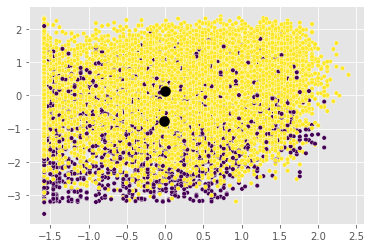

In [43]:
#Joining two graphs together
sns.scatterplot(X_sc[:, 0], X_sc[:, 1], c = y_km, s = 20, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100);